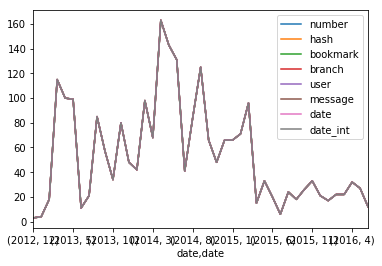

In [2]:
import hglib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

%matplotlib inline

def calculate_insertions (client, ahash): 
    diff = client.diff(change = ahash, stat=True)
    m = re.search ('(\d+) insertions', diff)
    if m == None:
        print diff
        return 0
    return int(m.groups()[0])

client = hglib.open("D:\Neurosoft\Programs\EEG_WPF")

s = pd.DataFrame(client.log(), columns = ["number","hash","bookmark","branch","user","message","date"])

s['date'] = pd.to_datetime(s.date)

s['date_int'] = s.date.astype(np.int64)

#s['insertions'] = s.hash.apply(lambda m : calculate_insertions (client, m))

# s.iloc[s['insertions'].idxmax()]






s.groupby([s["date"].dt.year, s["date"].dt.month]).count().plot()

#s = s.sort_values('date', ascending=True)

#plt.plot(s['date'], s['insertions'])

#s.plot (x='date', y='insertions', kind='line')
